# Analysis of Historical Airplane Crashes

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [7]:
df = pd.read_csv("airplane_crashes_and_fatalities_since_1908.csv")

In [8]:
df.head(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,7/12/1912,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [12]:
df.shape

(5268, 13)

In [9]:
df.dtypes

Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

In [10]:
df.isnull().sum() 

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [11]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [13]:
# working on yearly totals

df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].map(lambda x: x.day)
df['Year'] = df['Date'].map(lambda x: x.year)
df['Month'] = df['Date'].map(lambda x: x.month)

Gathering information for Top 10 Operators and Airplane Types that have crashed

In [14]:
#creating data frame with just operator and type
df1 = df[['Operator', 'Type']]

In [15]:
df1.head()

,Operator,Type
0,Military - U.S. Army,Wright Flyer III
1,Military - U.S. Navy,Dirigible
2,Private,Curtiss seaplane
3,Military - German Navy,Zeppelin L-1 (airship)
4,Military - German Navy,Zeppelin L-2 (airship)


## Top Ten Opertaors with Crashes

In [25]:
# Calculating the operators that have have had the most crashes
# grouping operator and counting number of crashes
# then sorting those values to get the top 10 operators

operator_count = df1.groupby(["Operator"])['Operator'].count()
operator_count = operator_count.rename(columns={'Operator': 'Count'})
operator_count.sort_values(ascending=False).head(10)


Operator
Aeroflot                               179
Military - U.S. Air Force              176
Air France                              70
Deutsche Lufthansa                      65
United Air Lines                        44
Air Taxi                                44
China National Aviation Corporation     44
Military - U.S. Army Air Forces         43
Pan American World Airways              41
Military - Royal Air Force              36
dtype: int64

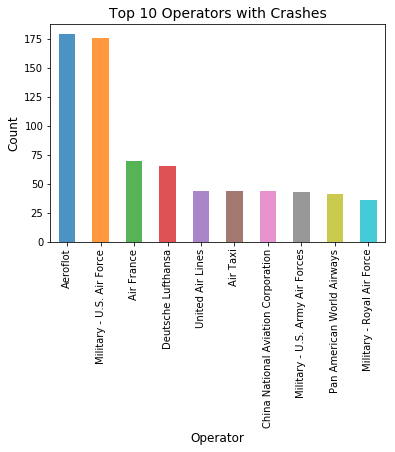

In [26]:
# Creating bar chart to reflect Top 10 Operators
opr_chart= operator_count.sort_values(ascending=False)[:10].plot(kind='bar', alpha=0.8)
opr_chart.set_xlabel("Operator", fontsize=12)
opr_chart.set_ylabel("Count", fontsize=12)
opr_chart.set_title("Top 10 Operators with Crashes", fontsize=14)
plt.show()

In [27]:
# Calculating the Airplane Types that have have had the most crashes
# grouping Types and counting number of crashes
# then sorting those values to get the top 10 Airplane Types

type_count = df1.groupby(["Type"])['Type'].count()
type_count = type_count.rename(columns={'Type': 'Count'})
type_count.sort_values(ascending=False).head(10)


Type
Douglas DC-3                                334
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                74
Douglas C-47                                 62
Douglas DC-4                                 40
Yakovlev YAK-40                              37
Antonov AN-26                                36
Junkers JU-52/3m                             32
Douglas C-47B                                29
De Havilland DH-4                            28
dtype: int64

## Charting Top Ten Airplane Types that have crashed

In [28]:
# creating new dataframe with just the Operator and Type counts
updated_df1 = pd.DataFrame({
    "Operator": operator_count,
    "Types": type_count})

updated_df1.head()

,Operator,Types
A B Aerotransport,2.0,NaN
AAC-1 Toucan,NaN,1.0
AB Aerotransport,3.0,NaN
ACES Colombia,3.0,NaN
ADC Airlines,2.0,NaN


In [29]:
# sorting Type values to get the top 10 that have crashed
updated_df1.sort_values(by='Types', ascending=False).head(10)

,Operator,Types
Douglas DC-3,NaN,334.0
de Havilland Canada DHC-6 Twin Otter 300,NaN,81.0
Douglas C-47A,NaN,74.0
Douglas C-47,NaN,62.0
Douglas DC-4,NaN,40.0
Yakovlev YAK-40,NaN,37.0
Antonov AN-26,NaN,36.0
Junkers JU-52/3m,NaN,32.0
Douglas C-47B,NaN,29.0
De Havilland DH-4,NaN,28.0


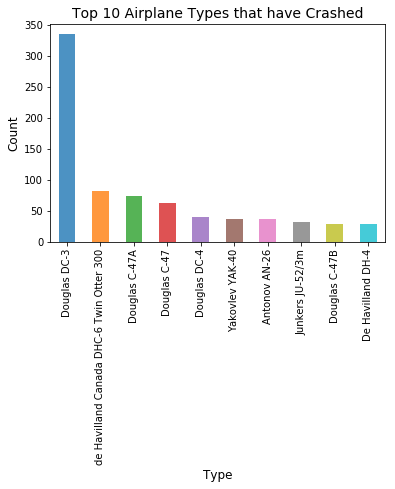

In [32]:
# Creating bar chart to reflect Top 10 Operators
type_chart= type_count.sort_values(ascending=False)[:10].plot(kind='bar', alpha=0.8)
type_chart.set_xlabel("Type", fontsize=12)
type_chart.set_ylabel("Count", fontsize=12)
type_chart.set_title("Top 10 Airplane Types that have Crashed", fontsize=14)
plt.show()

## Fatalities vs Total number of people aboard plane

In [33]:
#creating data frame with just operator, people aboard, fatalities and ground
df2 = df[['Operator', 'Aboard', 'Fatalities', 'Ground']]

In [34]:
# Grouping by Operator
df2.groupby(['Operator']).max()
df2.head(10)

,Operator,Aboard,Fatalities,Ground
0,Military - U.S. Army,2.0,1.0,0.0
1,Military - U.S. Navy,5.0,5.0,0.0
2,Private,1.0,1.0,0.0
3,Military - German Navy,20.0,14.0,0.0
4,Military - German Navy,30.0,30.0,0.0
5,Military - German Navy,41.0,21.0,0.0
6,Military - German Navy,19.0,19.0,0.0
7,Military - German Army,20.0,20.0,0.0
8,Military - German Navy,22.0,22.0,0.0
9,Military - German Navy,19.0,19.0,0.0


In [35]:
# Calculating the fatalities for top 10 operators 
# grouping by operator and counting number of fatalities
# then sorting those values to get the number of fatalities by Operator

fatalities_count = df2.groupby(["Operator"])['Fatalities'].sum()
fatalities_count.sort_values(ascending=False).head(15)


Operator
Aeroflot                           7156.0
Military - U.S. Air Force          3717.0
Air France                         1734.0
American Airlines                  1421.0
Pan American World Airways         1302.0
Military - U.S. Army Air Forces    1070.0
United Air Lines                   1021.0
AVIANCA                             941.0
Turkish Airlines (THY)              891.0
Indian Airlines                     863.0
China Airlines (Taiwan)             847.0
Air India                           827.0
Military - Russian Air Force        797.0
Trans World Airlines                784.0
Military - U.S. Navy                767.0
Name: Fatalities, dtype: float64

In [36]:
# Calculating the total passangers aboard for top 10 operators 
# grouping by operator and counting number of passangers aboard
# then sorting those values to get the number of passangers aboard by Operator

totals_count = df2.groupby(["Operator"])['Aboard'].sum()
totals_count.sort_values(ascending=False).head(15)

Operator
Aeroflot                           8870.0
Military - U.S. Air Force          4502.0
Air France                         2874.0
Pan American World Airways         2812.0
United Air Lines                   2460.0
American Airlines                  2063.0
Philippine Air Lines               1712.0
China Airlines (Taiwan)            1590.0
Trans World Airlines               1577.0
Indian Airlines                    1453.0
Korean Airlines                    1449.0
Eastern Air Lines                  1360.0
Garuda Indonesia Airlines          1204.0
Military - U.S. Army Air Forces    1100.0
Japan Air Lines                    1094.0
Name: Aboard, dtype: float64

In [37]:
# creating new dataframe with just the Fatalities and Total Passengers counts
updated_df2 = pd.DataFrame({
    "Fatalities": fatalities_count,
    "Total Passengers": totals_count})

updated_df2.head()

,Fatalities,Total Passengers
Operator,,
A B Aerotransport,3.0,17.0
AB Aerotransport,58.0,64.0
ACES Colombia,40.0,41.0
ADC Airlines,97.0,160.0
ADES Colombia,22.0,23.0


In [38]:
# sorting Fatalities and total passengers values for the top 10 operators
updated_df2.sort_values(by='Fatalities', ascending=False).head(15)

,Fatalities,Total Passengers
Operator,,
Aeroflot,7156.0,8870.0
Military - U.S. Air Force,3717.0,4502.0
Air France,1734.0,2874.0
American Airlines,1421.0,2063.0
Pan American World Airways,1302.0,2812.0
Military - U.S. Army Air Forces,1070.0,1100.0
United Air Lines,1021.0,2460.0
AVIANCA,941.0,1067.0
Turkish Airlines (THY),891.0,964.0


In [41]:
fatal_by_Op = updated_df2.groupby('Operator')[['Fatalities']].sum()
fatal_by_Op = fatal_by_Op.rename(columns={"Operator": "Fatalities"})
fatal_by_Op = fatal_by_Op.sort_values(by='Fatalities', ascending=False)
fatal_by_OpTOP = fatal_by_Op.head(10)

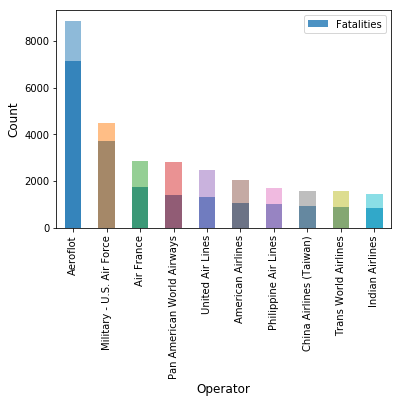

In [40]:
# Creating bar chart to reflect fatalities and total passengers for the Top 10 Operators

fatal_chart= fatal_by_Op.sort_values(by='Fatalities', ascending=False)[:10].plot(kind='bar', alpha=0.8)
type_chart=totals_count.sort_values( ascending=False)[:10].plot(kind='bar', alpha=0.5)
fatal_chart.set_xlabel("Operator", fontsize=12)
fatal_chart.set_ylabel("Count", fontsize=12)
plt.show()